# Adult Census Income

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

In [1]:
from IPython.display import Image
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter("ignore")


In [2]:
df = pd.read_csv("adult.csv") # Dataset path

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df[df == '?'] = np.nan # replace ? with NaN 

In [6]:
df.isnull().sum() # Checking missing values

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True) #fill missing values with most frequent value

In [8]:
df.isnull().sum() # Checking missing values

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
#Assign dummy variables for categorical variables with labelk encoder
LE = preprocessing.LabelEncoder()

# select all categorical variables
df_obj= df.select_dtypes(include=['object'])
df_obj= df.apply(LE.fit_transform)
df_obj.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,3,2649,11,8,6,9,1,4,0,0,91,39,38,0
1,65,3,6514,11,8,6,3,1,4,0,0,91,17,38,0
2,49,3,11175,15,9,6,9,4,2,0,0,91,39,38,0
3,37,3,7009,5,3,0,6,4,4,0,0,90,39,38,0
4,24,3,16850,15,9,5,9,3,4,0,0,90,39,38,0


In [11]:
X=df_obj.drop(columns=['income']) # input
y=df_obj['income'] #response

In [12]:
df_obj.describe() # Numerical description of data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,21.580326,3.094438,10498.892479,10.298210,9.080679,2.611836,6.138755,1.446362,3.665858,0.669205,6.501213,2.053285,39.377937,36.417155,0.240810
std,13.635502,1.107194,6048.972814,3.870264,2.572720,1.506222,3.972708,1.606771,0.848806,0.470506,23.300287,10.056564,12.144006,6.056047,0.427581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,3.000000,5396.000000,9.000000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,38.000000,0.000000
50%,20.000000,3.000000,10348.000000,11.000000,9.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,38.000000,0.000000
75%,31.000000,3.000000,15487.000000,12.000000,11.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,38.000000,0.000000
max,72.000000,7.000000,21647.000000,15.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,118.000000,91.000000,93.000000,40.000000,1.000000


In [26]:
#Splitting data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [27]:
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
5728,13,3,5411,9,12,2,0,0,4,1,0,0,39,38
10700,1,3,2797,11,8,4,9,3,4,1,0,0,59,38
29425,14,3,15829,15,9,5,5,1,4,1,0,0,39,38
2088,20,3,21504,9,12,2,3,0,4,1,108,0,39,38
16292,23,3,9509,11,8,2,2,0,4,1,0,0,49,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,15,5,11665,11,8,2,4,0,4,1,0,0,39,21
3240,25,3,20067,12,13,4,3,1,4,0,71,0,39,38
13497,28,3,15382,9,12,2,3,0,4,1,0,0,39,38
23587,2,7,1240,11,8,4,4,3,4,1,0,0,9,38


### Decision tree Classiication using Sklearn

In [40]:
from sklearn.tree import DecisionTreeClassifier

#clf_tree = DecisionTreeClassifier(criterion="entropy",max_depth=5, random_state=17)

clf_tree = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=17)


clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

### Metrics & Confusion Matrix

In [41]:
clf_tree.score(X_test,y_test)

0.8400040945849114

In [42]:
clf_tree.score(X_train,y_train)

0.8398560898560898

In [43]:
#best_knn_model  = knn_models[test_best_k[0]]
y_pred = clf_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7475
           1       0.76      0.47      0.58      2294

    accuracy                           0.84      9769
   macro avg       0.81      0.71      0.74      9769
weighted avg       0.83      0.84      0.83      9769



Text(0.5, 25.722222222222214, 'Predicted label')

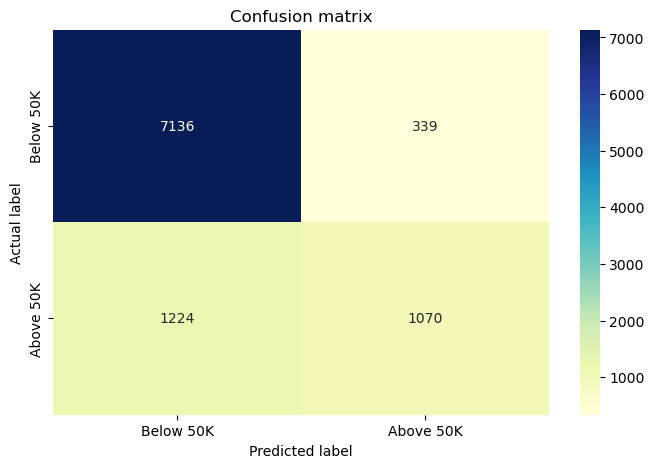

In [44]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
p = sns.heatmap(pd.DataFrame(cm,columns=["Below 50K","Above 50K"],index=["Below 50K","Above 50K"]), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
from sklearn import tree

[Text(0.5, 0.875, 'X[7] <= 0.5\ngini = 0.368\nsamples = 22792\nvalue = [17245, 5547]'),
 Text(0.25, 0.625, 'X[4] <= 11.5\ngini = 0.495\nsamples = 9241\nvalue = [5072, 4169]'),
 Text(0.125, 0.375, 'X[10] <= 78.0\ngini = 0.441\nsamples = 6420\nvalue = [4308, 2112]'),
 Text(0.0625, 0.125, 'gini = 0.416\nsamples = 6111\nvalue = [4305, 1806]'),
 Text(0.1875, 0.125, 'gini = 0.019\nsamples = 309\nvalue = [3, 306]'),
 Text(0.375, 0.375, 'X[10] <= 78.0\ngini = 0.395\nsamples = 2821\nvalue = [764, 2057]'),
 Text(0.3125, 0.125, 'gini = 0.434\nsamples = 2394\nvalue = [761, 1633]'),
 Text(0.4375, 0.125, 'gini = 0.014\nsamples = 427\nvalue = [3, 424]'),
 Text(0.75, 0.625, 'X[10] <= 90.5\ngini = 0.183\nsamples = 13551\nvalue = [12173, 1378]'),
 Text(0.625, 0.375, 'X[7] <= 4.5\ngini = 0.148\nsamples = 13227\nvalue = [12160, 1067]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 12195\nvalue = [11587, 608]'),
 Text(0.6875, 0.125, 'gini = 0.494\nsamples = 1032\nvalue = [573, 459]'),
 Text(0.875, 0.375, 

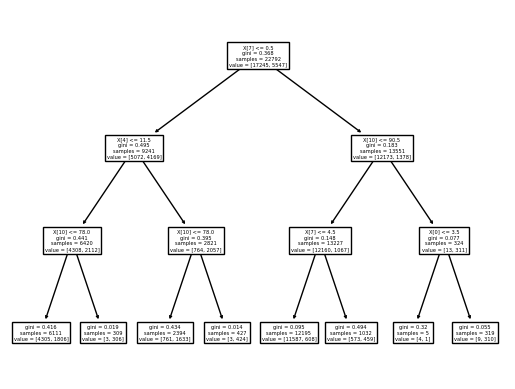

In [46]:
tree.plot_tree(clf_tree)

### Export tree as a PDF

In [47]:
import graphviz 
dot_data = tree.export_graphviz(clf_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("decison_tree") 

'decison_tree.pdf'

###  Using Gridsearch to find Optimum Tree Depth

In [51]:
params_tree = {'max_depth': range(2, 15)}
best_tree = GridSearchCV(DecisionTreeClassifier(random_state=99),
                                params_tree, cv=10)                  
best_tree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=99),
             param_grid={'max_depth': range(2, 15)})

In [52]:
print("Best Decision Tree params:", best_tree.best_params_)
print("Best cross validaton score",best_tree.best_score_)

Best Decision Tree params: {'max_depth': 10}
Best cross validaton score 0.8529307059883143


In [54]:
optimal_tree = DecisionTreeClassifier(max_depth=10, random_state=99)
optimal_tree.fit(X_train, y_train)
y_pred_optimal = optimal_tree.predict(X_test)
accuracy_score(y_test, y_pred_optimal)

0.8530044016787798

With optimization scoe is improved 